In [40]:
previous_application_train = pd.read_csv("./raw/previous_application.csv")

In [41]:
previous_application_train.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
len(set(previous_application_train.SK_ID_CURR))

338857

In [43]:
# 각 DataFrame에 Target 값 넣기
#credit_card = credit_card_train.merge(target, how = "inner", on="SK_ID_CURR")
#installments_payment = installments_payment_train.merge(target, how = "inner", on="SK_ID_CURR")
#previous_application = previous_application_train.merge(target, how = "inner", on="SK_ID_CURR")

In [44]:
#previous_application0 = previous_application[previous_application.TARGET == 0]
#previous_application1 = previous_application[previous_application.TARGET == 1]

In [45]:
#print("credit_card 원래 train수: {}, ID 수 : {}".format(len(credit_card), len(set(credit_card.SK_ID_CURR))))
#print("installments_payment 원래 train수: {}, ID 수 : {}".format(len(installments_payment), len(set(installments_payment.SK_ID_CURR))))
print("previous_application 원래 train수: {}, ID 수 : {}".format(len(previous_application_train), len(set(previous_application_train.SK_ID_CURR))))

previous_application 원래 train수: 1670214, ID 수 : 338857


In [46]:
# previous_application
previous_application_multi = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE',
                              'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 
                              'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
                              'CHANNEL_TYPE',  'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
                              'PRODUCT_COMBINATION', 'HOUR_APPR_PROCESS_START', 'CNT_PAYMENT']
previous_application_continuous = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 
                                  'AMT_GOODS_PRICE', 'DAYS_FIRST_DRAWING', 'DAYS_DECISION', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
                              'DAYS_LAST_DUE', 'DAYS_TERMINATION']
previous_application_dummy = ['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL']
previous_application_normalized = ['RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']
confirm_needed= ['SELLERPLACE_AREA', ]

# installments_payments 파일 변수
#installments_payments_continuous = ['DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']
#installments_payments_multi = []
#confirm_needed= ['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER']

# credit_card_balance 파일
#credit_card_continuous = ['MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
#                          'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',
#                          'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
#                          'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT',
#                          'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
#                          'AMT_TOTAL_RECEIVABLE', 'SK_DPD', 'SK_DPD_DEF']
#credit_card_multi = ['NAME_CONTRACT_STATUS']
#confirm_needed = ['CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
#                   'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM']

# 'XNA', 'XAP' 를 NaN처리, NaN값이 70%이상인 경우 변수제거

In [47]:
previous_application = previous_application_train.replace("XNA", np.NaN)
previous_application = previous_application.replace("XAP", np.NaN)
previous_application = previous_application.replace("nan", np.NaN)
previous_application = previous_application.replace("NaN", np.NaN)

- train에 ID가 있는 데이터 중에서 nan값의 비율
- DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL은 nan값이 561106개로 동일

In [48]:
previous_application_train.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

XNA, XAP를 nan으로 변환한 후 nan값의 비율

In [49]:
removed_var = []
for var in previous_application.columns:
    print(var, previous_application[var].isnull().sum(), round(previous_application[var].isnull().sum()/len(previous_application[var])*100, 2), sep="\t")
    if round(previous_application[var].isnull().sum()/len(previous_application[var])*100) >= 30:
             removed_var.append(var)

SK_ID_PREV	0	0.0
SK_ID_CURR	0	0.0
NAME_CONTRACT_TYPE	346	0.02
AMT_ANNUITY	372235	22.29
AMT_APPLICATION	0	0.0
AMT_CREDIT	1	0.0
AMT_DOWN_PAYMENT	895844	53.64
AMT_GOODS_PRICE	385515	23.08
WEEKDAY_APPR_PROCESS_START	0	0.0
HOUR_APPR_PROCESS_START	0	0.0
FLAG_LAST_APPL_PER_CONTRACT	0	0.0
NFLAG_LAST_APPL_IN_DAY	0	0.0
RATE_DOWN_PAYMENT	895844	53.64
RATE_INTEREST_PRIMARY	1664263	99.64
RATE_INTEREST_PRIVILEGED	1664263	99.64
NAME_CASH_LOAN_PURPOSE	1600579	95.83
NAME_CONTRACT_STATUS	0	0.0
DAYS_DECISION	0	0.0
NAME_PAYMENT_TYPE	627384	37.56
CODE_REJECT_REASON	1358337	81.33
NAME_TYPE_SUITE	820405	49.12
NAME_CLIENT_TYPE	1941	0.12
NAME_GOODS_CATEGORY	950809	56.93
NAME_PORTFOLIO	372230	22.29
NAME_PRODUCT_TYPE	1063666	63.68
CHANNEL_TYPE	0	0.0
SELLERPLACE_AREA	0	0.0
NAME_SELLER_INDUSTRY	855720	51.23
CNT_PAYMENT	372230	22.29
NAME_YIELD_GROUP	517215	30.97
PRODUCT_COMBINATION	346	0.02
DAYS_FIRST_DRAWING	673065	40.3
DAYS_FIRST_DUE	673065	40.3
DAYS_LAST_DUE_1ST_VERSION	673065	40.3
DAYS_LAST_DUE	673065	40.3
DAYS

In [50]:
print(removed_var, len(removed_var))

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'] 18


In [51]:
for var in removed_var:
    del previous_application[var]

In [52]:
len(previous_application_train.columns) - len(removed_var)

19

In [53]:
len(previous_application.columns)

19

---

# continuous 변수에서 NaN값 평균으로 채우기

In [54]:
continuous = list(set(previous_application_continuous+previous_application_normalized) - set(removed_var))

In [55]:
continuous

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_APPLICATION',
 'DAYS_DECISION']

In [56]:
for var in continuous:
    previous_application[var].fillna(round(previous_application[var].mean(), 3), inplace=True)

In [57]:
# 원래 값과 비교
previous_application_train[continuous].describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_APPLICATION,DAYS_DECISION
count,1.297979e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06
mean,1.595512e+04,1.961140e+05,2.278473e+05,1.752339e+05,-8.806797e+02
std,1.478214e+04,3.185746e+05,3.153966e+05,2.927798e+05,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03
25%,6.321780e+03,2.416050e+04,5.084100e+04,1.872000e+04,-1.300000e+03
50%,1.125000e+04,8.054100e+04,1.123200e+05,7.104600e+04,-5.810000e+02
75%,2.065842e+04,2.164185e+05,2.340000e+05,1.803600e+05,-2.800000e+02
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,-1.000000e+00


In [58]:
previous_application[continuous].describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_APPLICATION,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.595512e+04,1.961140e+05,2.278473e+05,1.752339e+05,-8.806797e+02
std,1.303122e+04,3.185745e+05,2.766123e+05,2.927798e+05,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03
25%,7.547096e+03,2.416050e+04,6.750000e+04,1.872000e+04,-1.300000e+03
50%,1.544967e+04,8.054100e+04,1.728000e+05,7.104600e+04,-5.810000e+02
75%,1.682403e+04,2.164185e+05,2.278473e+05,1.803600e+05,-2.800000e+02
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,-1.000000e+00


# category 변수에서 NaN값 mode으로 채우기

In [59]:
category = list(set(previous_application_multi+previous_application_dummy+confirm_needed) - set(removed_var))
category

['NAME_CONTRACT_TYPE',
 'CHANNEL_TYPE',
 'PRODUCT_COMBINATION',
 'NAME_PORTFOLIO',
 'HOUR_APPR_PROCESS_START',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_STATUS',
 'CNT_PAYMENT',
 'SELLERPLACE_AREA',
 'NAME_CLIENT_TYPE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY']

In [60]:
for var in category:
    previous_application[var] = previous_application[var].astype("str")
    previous_application[var] = previous_application[var].replace("nan", previous_application[var].mode())

In [61]:
len(previous_application[previous_application.SELLERPLACE_AREA == "-1"])

762675

'SELLERPLACE_AREA'의 -1은 nan과 같은 건가

In [62]:
previous_application['SELLERPLACE_AREA'].mode()

0    -1
dtype: object

In [63]:
previous_application.NAME_PORTFOLIO.replace("nan", "POS", inplace=True)
previous_application.PRODUCT_COMBINATION.replace("nan", "Cash", inplace=True)
previous_application.NAME_CLIENT_TYPE.replace("nan", "Repeater", inplace=True)
previous_application.NAME_CONTRACT_TYPE.replace("nan", "Cash loans", inplace=True)

왜 nan 값이 replace 안되는 거지..., fillna도 안되고

In [64]:
previous_application_train[category].describe(include=["object", "category"])

,NAME_CONTRACT_TYPE,CHANNEL_TYPE,PRODUCT_COMBINATION,NAME_PORTFOLIO,WEEKDAY_APPR_PROCESS_START,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,FLAG_LAST_APPL_PER_CONTRACT
count,1670214,1670214,1669868,1670214,1670214,1670214,1670214,1670214
unique,4,8,17,5,7,4,4,2
top,Cash loans,Credit and cash offices,Cash,POS,TUESDAY,Approved,Repeater,Y
freq,747553,719968,285990,691011,255118,1036781,1231261,1661739


In [65]:
previous_application[category].describe(include=["object", "category"])

,NAME_CONTRACT_TYPE,CHANNEL_TYPE,PRODUCT_COMBINATION,NAME_PORTFOLIO,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,NAME_CONTRACT_STATUS,CNT_PAYMENT,SELLERPLACE_AREA,NAME_CLIENT_TYPE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214
unique,3,8,17,4,24,7,4,50,2097,3,2,2
top,Cash loans,Credit and cash offices,Cash,POS,11,TUESDAY,Approved,nan,-1,Repeater,Y,1
freq,747899,719968,286336,1063241,192728,255118,1036781,372230,762675,1233202,1661739,1664314


In [66]:
for var in category:
    print(var, previous_application[var].unique())

NAME_CONTRACT_TYPE ['Consumer loans' 'Cash loans' 'Revolving loans']
CHANNEL_TYPE ['Country-wide' 'Contact center' 'Credit and cash offices' 'Stone'
 'Regional / Local' 'AP+ (Cash loan)' 'Channel of corporate sales'
 'Car dealer']
PRODUCT_COMBINATION ['POS mobile with interest' 'Cash X-Sell: low' 'Cash X-Sell: high'
 'Cash X-Sell: middle' 'Cash Street: high' 'Cash'
 'POS household without interest' 'POS household with interest'
 'POS other with interest' 'Card X-Sell' 'POS mobile without interest'
 'Card Street' 'POS industry with interest' 'Cash Street: low'
 'POS industry without interest' 'Cash Street: middle'
 'POS others without interest']
NAME_PORTFOLIO ['POS' 'Cash' 'Cards' 'Cars']
HOUR_APPR_PROCESS_START ['15' '11' '7' '9' '8' '10' '12' '13' '14' '16' '6' '4' '5' '19' '17' '18'
 '20' '22' '21' '3' '1' '2' '23' '0']
WEEKDAY_APPR_PROCESS_START ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
NAME_CONTRACT_STATUS ['Approved' 'Refused' 'Canceled' 'Unused off

---

- get_dummy후 groupby하려면 메모리 에러가 떠서 우선 sellerplace_area를 제거하고 파일 만들기
- sellerplace_area의 NAN값이라고 예상되는 -1이 762675개라 30%가 넘어 뺌

In [67]:
del previous_application["SELLERPLACE_AREA"]

In [68]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 18 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1670214 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670214 non-null float64
AMT_GOODS_PRICE                1670214 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null object
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_CLIENT_TYPE               1670214 non-null object
NAME_PORTFOLIO                 1670214 non-null object
CHANNEL_TYPE                   1670214 non-null object
CNT_PA

In [69]:
category

['NAME_CONTRACT_TYPE',
 'CHANNEL_TYPE',
 'PRODUCT_COMBINATION',
 'NAME_PORTFOLIO',
 'HOUR_APPR_PROCESS_START',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_STATUS',
 'CNT_PAYMENT',
 'SELLERPLACE_AREA',
 'NAME_CLIENT_TYPE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY']

In [70]:
previous_application_fi = pd.get_dummies(previous_application)

In [71]:
dataset = previous_application_fi.groupby("SK_ID_CURR").sum()
dataset[continuous] = previous_application_fi.groupby("SK_ID_CURR")[continuous].mean()

In [72]:
len(dataset), len(dataset.columns)

(338857, 130)

In [73]:
dataset.tail()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,FLAG_LAST_APPL_PER_CONTRACT_N,FLAG_LAST_APPL_PER_CONTRACT_Y,NFLAG_LAST_APPL_IN_DAY_0,NFLAG_LAST_APPL_IN_DAY_1,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,CNT_PAYMENT_0.0,CNT_PAYMENT_10.0,CNT_PAYMENT_11.0,CNT_PAYMENT_12.0,CNT_PAYMENT_13.0,CNT_PAYMENT_14.0,CNT_PAYMENT_15.0,CNT_PAYMENT_16.0,CNT_PAYMENT_17.0,CNT_PAYMENT_18.0,CNT_PAYMENT_19.0,CNT_PAYMENT_20.0,CNT_PAYMENT_21.0,CNT_PAYMENT_22.0,CNT_PAYMENT_23.0,CNT_PAYMENT_24.0,CNT_PAYMENT_26.0,CNT_PAYMENT_28.0,CNT_PAYMENT_29.0,CNT_PAYMENT_3.0,CNT_PAYMENT_30.0,CNT_PAYMENT_32.0,CNT_PAYMENT_33.0,CNT_PAYMENT_34.0,CNT_PAYMENT_35.0,CNT_PAYMENT_36.0,CNT_PAYMENT_38.0,CNT_PAYMENT_39.0,CNT_PAYMENT_4.0,CNT_PAYMENT_40.0,CNT_PAYMENT_41.0,CNT_PAYMENT_42.0,CNT_PAYMENT_44.0,CNT_PAYMENT_45.0,CNT_PAYMENT_46.0,CNT_PAYMENT_47.0,CNT_PAYMENT_48.0,CNT_PAYMENT_5.0,CNT_PAYMENT_53.0,CNT_PAYMENT_54.0,CNT_PAYMENT_59.0,CNT_PAYMENT_6.0,CNT_PAYMENT_60.0,CNT_PAYMENT_66.0,CNT_PAYMENT_7.0,CNT_PAYMENT_72.0,CNT_PAYMENT_8.0,CNT_PAYMENT_84.0,CNT_PAYMENT_9.0,CNT_PAYMENT_nan,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
456251,2248017,6605.910000,40455.000,40455.00,40455.000,-273.000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
456252,1503599,10074.465000,57595.500,56821.50,57595.500,-2497.000,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
456253

In [74]:
dataset.reset_index(inplace=True)

In [75]:
del dataset["SK_ID_PREV"]

In [76]:
dataset.tail()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,FLAG_LAST_APPL_PER_CONTRACT_N,FLAG_LAST_APPL_PER_CONTRACT_Y,NFLAG_LAST_APPL_IN_DAY_0,NFLAG_LAST_APPL_IN_DAY_1,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,CNT_PAYMENT_0.0,CNT_PAYMENT_10.0,CNT_PAYMENT_11.0,CNT_PAYMENT_12.0,CNT_PAYMENT_13.0,CNT_PAYMENT_14.0,CNT_PAYMENT_15.0,CNT_PAYMENT_16.0,CNT_PAYMENT_17.0,CNT_PAYMENT_18.0,CNT_PAYMENT_19.0,CNT_PAYMENT_20.0,CNT_PAYMENT_21.0,CNT_PAYMENT_22.0,CNT_PAYMENT_23.0,CNT_PAYMENT_24.0,CNT_PAYMENT_26.0,CNT_PAYMENT_28.0,CNT_PAYMENT_29.0,CNT_PAYMENT_3.0,CNT_PAYMENT_30.0,CNT_PAYMENT_32.0,CNT_PAYMENT_33.0,CNT_PAYMENT_34.0,CNT_PAYMENT_35.0,CNT_PAYMENT_36.0,CNT_PAYMENT_38.0,CNT_PAYMENT_39.0,CNT_PAYMENT_4.0,CNT_PAYMENT_40.0,CNT_PAYMENT_41.0,CNT_PAYMENT_42.0,CNT_PAYMENT_44.0,CNT_PAYMENT_45.0,CNT_PAYMENT_46.0,CNT_PAYMENT_47.0,CNT_PAYMENT_48.0,CNT_PAYMENT_5.0,CNT_PAYMENT_53.0,CNT_PAYMENT_54.0,CNT_PAYMENT_59.0,CNT_PAYMENT_6.0,CNT_PAYMENT_60.0,CNT_PAYMENT_66.0,CNT_PAYMENT_7.0,CNT_PAYMENT_72.0,CNT_PAYMENT_8.0,CNT_PAYMENT_84.0,CNT_PAYMENT_9.0,CNT_PAYMENT_nan,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
338852,456251,6605.910000,40455.000,40455.00,40455.000,-273.000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
338853,456252,10074.465000,57595.500,56821.50,57595.500,-2497.000,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
338854,456253,4770.405000,24162.750,20625.75,24162.750,-2380.000,0,2,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2,0,0,0,

In [77]:
train = pd.read_csv("./raw/application_train.csv", usecols=["SK_ID_CURR"])

In [78]:
len(train)

307511

In [79]:
dataset_f1 = dataset[dataset.SK_ID_CURR.isin(train.SK_ID_CURR)]
dataset_f1.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,FLAG_LAST_APPL_PER_CONTRACT_N,FLAG_LAST_APPL_PER_CONTRACT_Y,NFLAG_LAST_APPL_IN_DAY_0,NFLAG_LAST_APPL_IN_DAY_1,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,CNT_PAYMENT_0.0,CNT_PAYMENT_10.0,CNT_PAYMENT_11.0,CNT_PAYMENT_12.0,CNT_PAYMENT_13.0,CNT_PAYMENT_14.0,CNT_PAYMENT_15.0,CNT_PAYMENT_16.0,CNT_PAYMENT_17.0,CNT_PAYMENT_18.0,CNT_PAYMENT_19.0,CNT_PAYMENT_20.0,CNT_PAYMENT_21.0,CNT_PAYMENT_22.0,CNT_PAYMENT_23.0,CNT_PAYMENT_24.0,CNT_PAYMENT_26.0,CNT_PAYMENT_28.0,CNT_PAYMENT_29.0,CNT_PAYMENT_3.0,CNT_PAYMENT_30.0,CNT_PAYMENT_32.0,CNT_PAYMENT_33.0,CNT_PAYMENT_34.0,CNT_PAYMENT_35.0,CNT_PAYMENT_36.0,CNT_PAYMENT_38.0,CNT_PAYMENT_39.0,CNT_PAYMENT_4.0,CNT_PAYMENT_40.0,CNT_PAYMENT_41.0,CNT_PAYMENT_42.0,CNT_PAYMENT_44.0,CNT_PAYMENT_45.0,CNT_PAYMENT_46.0,CNT_PAYMENT_47.0,CNT_PAYMENT_48.0,CNT_PAYMENT_5.0,CNT_PAYMENT_53.0,CNT_PAYMENT_54.0,CNT_PAYMENT_59.0,CNT_PAYMENT_6.0,CNT_PAYMENT_60.0,CNT_PAYMENT_66.0,CNT_PAYMENT_7.0,CNT_PAYMENT_72.0,CNT_PAYMENT_8.0,CNT_PAYMENT_84.0,CNT_PAYMENT_9.0,CNT_PAYMENT_nan,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
1,100002,9251.775000,179055.00,179055.00,179055.000,-606.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,100003,56553.990000,435436.50,484191.00,435436.500,-1305.000000,1,2,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,3,0,0,0,0,2,1,0,0,1,2,0,0,0,0,1,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
3,100004,5357.250000,24282.00,20106.00,24282.000,-815.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,

In [80]:
test = pd.read_csv("./raw/application_test.csv", usecols=["SK_ID_CURR"])

In [81]:
test.head()

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038


In [82]:
dataset_f2 = dataset[dataset.SK_ID_CURR.isin(test.SK_ID_CURR)]
dataset_f2.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,FLAG_LAST_APPL_PER_CONTRACT_N,FLAG_LAST_APPL_PER_CONTRACT_Y,NFLAG_LAST_APPL_IN_DAY_0,NFLAG_LAST_APPL_IN_DAY_1,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,CNT_PAYMENT_0.0,CNT_PAYMENT_10.0,CNT_PAYMENT_11.0,CNT_PAYMENT_12.0,CNT_PAYMENT_13.0,CNT_PAYMENT_14.0,CNT_PAYMENT_15.0,CNT_PAYMENT_16.0,CNT_PAYMENT_17.0,CNT_PAYMENT_18.0,CNT_PAYMENT_19.0,CNT_PAYMENT_20.0,CNT_PAYMENT_21.0,CNT_PAYMENT_22.0,CNT_PAYMENT_23.0,CNT_PAYMENT_24.0,CNT_PAYMENT_26.0,CNT_PAYMENT_28.0,CNT_PAYMENT_29.0,CNT_PAYMENT_3.0,CNT_PAYMENT_30.0,CNT_PAYMENT_32.0,CNT_PAYMENT_33.0,CNT_PAYMENT_34.0,CNT_PAYMENT_35.0,CNT_PAYMENT_36.0,CNT_PAYMENT_38.0,CNT_PAYMENT_39.0,CNT_PAYMENT_4.0,CNT_PAYMENT_40.0,CNT_PAYMENT_41.0,CNT_PAYMENT_42.0,CNT_PAYMENT_44.0,CNT_PAYMENT_45.0,CNT_PAYMENT_46.0,CNT_PAYMENT_47.0,CNT_PAYMENT_48.0,CNT_PAYMENT_5.0,CNT_PAYMENT_53.0,CNT_PAYMENT_54.0,CNT_PAYMENT_59.0,CNT_PAYMENT_6.0,CNT_PAYMENT_60.0,CNT_PAYMENT_66.0,CNT_PAYMENT_7.0,CNT_PAYMENT_72.0,CNT_PAYMENT_8.0,CNT_PAYMENT_84.0,CNT_PAYMENT_9.0,CNT_PAYMENT_nan,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,100001,3951.0000,24835.50,23787.000,24835.50000,-1740.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,100005,10384.1605,22308.75,20076.750,136232.38950,-536.0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,1,1,0,0,1,0,1,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12,100013,12597.4265,130871.25,146134.125,187833.06975,-837.5,2,2,0,0,1,1,0,1,0,1,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4,3,1,0,0,0,0,4,0,0,1,3,0,

In [83]:
dataset_f1.to_csv("previous_application_dataset_train.csv", index=False)

In [84]:
dataset_f2.to_csv("previous_application_dataset_test.csv", index=False)

---

---

ID로 묶었을 때 nan값의 비율(continuous 변수)

In [71]:
a = previous_application.groupby("SK_ID_CURR")[previous_application_continuous+previous_application_normalized].mean()

In [72]:
removed_var = []
for var in a.columns:
    print(var, a[var].isnull().sum(), round(a[var].isnull().sum()/len(a[var])*100, 2), sep="\t")
    if round(a[var].isnull().sum()/len(a[var])*100) >= 70:
             removed_var.append(var)

AMT_ANNUITY	417	0.14
AMT_APPLICATION	0	0.0
AMT_CREDIT	0	0.0
AMT_DOWN_PAYMENT	17452	6.0
AMT_GOODS_PRICE	975	0.33
DAYS_FIRST_DRAWING	1297	0.45
DAYS_DECISION	0	0.0
DAYS_FIRST_DUE	1297	0.45
DAYS_LAST_DUE_1ST_VERSION	1297	0.45
DAYS_LAST_DUE	1297	0.45
DAYS_TERMINATION	1297	0.45
CNT_PAYMENT	415	0.14
RATE_DOWN_PAYMENT	17452	6.0
RATE_INTEREST_PRIMARY	286448	98.42
RATE_INTEREST_PRIVILEGED	286448	98.42


In [73]:
print(removed_var)

['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']


ID로 묶었을 때 nan값의 비율(category 변수)

In [75]:
a = previous_application.groupby("SK_ID_CURR")[previous_application_multi+previous_application_dummy+['SELLERPLACE_AREA', ]].median()

In [76]:
removed_var = []
for var in a.columns:
    print(var, a[var].isnull().sum(), round(a[var].isnull().sum()/len(a[var])*100, 2), sep="\t")
    if round(a[var].isnull().sum()/len(a[var])*100) >= 70:
             removed_var.append(var)

HOUR_APPR_PROCESS_START	0	0.0
NFLAG_LAST_APPL_IN_DAY	0	0.0
NFLAG_INSURED_ON_APPROVAL	1297	0.45
SELLERPLACE_AREA	0	0.0


In [82]:
1- previous_application[previous_application_multi+previous_application_dummy+['SELLERPLACE_AREA']].count()/len(previous_application.SK_ID_CURR)

NAME_CONTRACT_TYPE             0.000221
WEEKDAY_APPR_PROCESS_START     0.000000
NAME_CASH_LOAN_PURPOSE         0.957973
NAME_CONTRACT_STATUS           0.000000
NAME_PAYMENT_TYPE              0.369923
CODE_REJECT_REASON             0.813405
NAME_TYPE_SUITE                0.491385
NAME_CLIENT_TYPE               0.001091
NAME_GOODS_CATEGORY            0.563916
NAME_PORTFOLIO                 0.217311
NAME_PRODUCT_TYPE              0.636664
CHANNEL_TYPE                   0.000000
NAME_SELLER_INDUSTRY           0.505992
NAME_YIELD_GROUP               0.303599
PRODUCT_COMBINATION            0.000221
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NFLAG_INSURED_ON_APPROVAL      0.396906
SELLERPLACE_AREA               0.000000
dtype: float64

---

In [30]:
previous_application.AMT_CREDIT.unique()

array([ 17145.  , 679671.  , 136444.5 , ..., 977724.  , 626796.  ,
       436370.22])

In [10]:
days = ["DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", "DAYS_TERMINATION"]
previous_application[days].max()

DAYS_FIRST_DRAWING           365243.0
DAYS_FIRST_DUE               365243.0
DAYS_LAST_DUE_1ST_VERSION    365243.0
DAYS_LAST_DUE                365243.0
DAYS_TERMINATION             365243.0
dtype: float64

DAYS는 연속변수라고 판단했지만 모두다 음수(1st빼고)고 365243으로 지정된 값이 있음 na도 있음
우선은 둘다 na으로 넣음

In [11]:
# 이상치로 들어간 동일하게 들어간 값을 na로 채움
previous_application.DAYS_FIRST_DRAWING.replace(previous_application.DAYS_FIRST_DRAWING.max(), np.NaN, inplace=True)
previous_application.DAYS_FIRST_DUE.replace(previous_application.DAYS_FIRST_DUE.max(), np.NaN, inplace=True)
previous_application.DAYS_LAST_DUE_1ST_VERSION.replace(previous_application.DAYS_LAST_DUE_1ST_VERSION.max(), np.NaN, inplace=True)
previous_application.DAYS_LAST_DUE.replace(previous_application.DAYS_LAST_DUE.max(), np.NaN, inplace=True)
previous_application.DAYS_TERMINATION.replace(previous_application.DAYS_TERMINATION.max(), np.NaN, inplace=True)

In [30]:
a, b = np.unique(previous_application.SELLERPLACE_AREA, return_counts=True)
print(len(a), b, sep="\n")

2077
[636583  50680   4470 ...      4      1      5]


In [12]:
%matplotlib inline

In [13]:
def make_graph(variable, N=100):
    sns.violinplot(x=previous_application.TARGET, y=previous_application[variable])
    plt.show()
    
    plt.hist(previous_application0[variable].dropna(), bins=N)
    plt.hist(previous_application1[variable].dropna(), bins=N)
    plt.show()

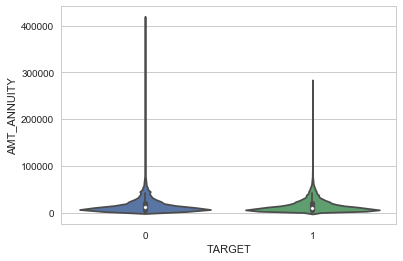

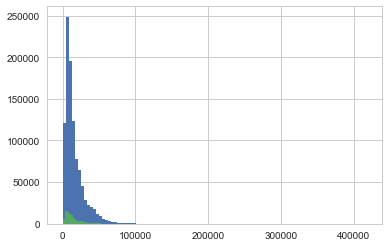

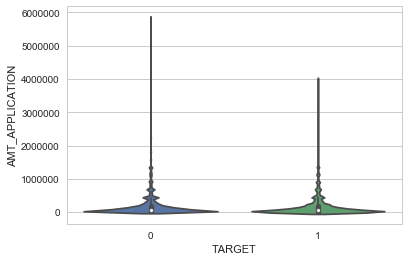

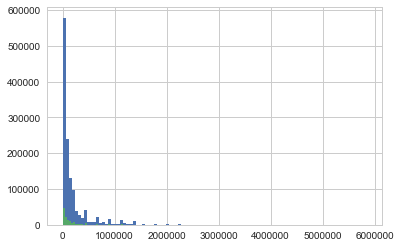

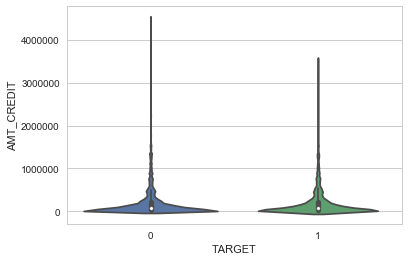

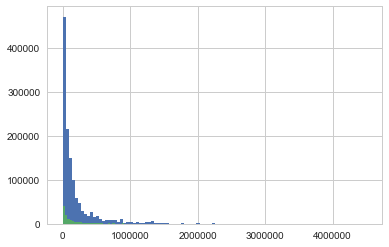

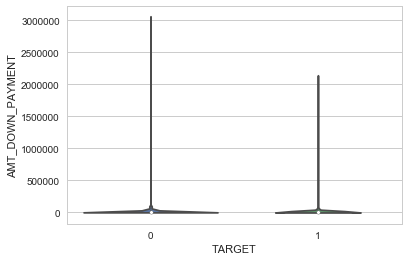

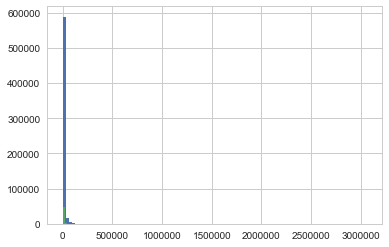

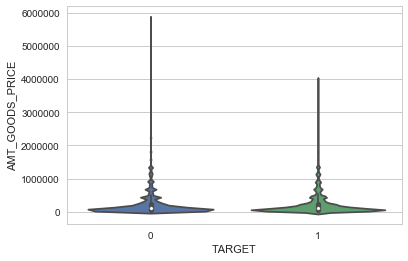

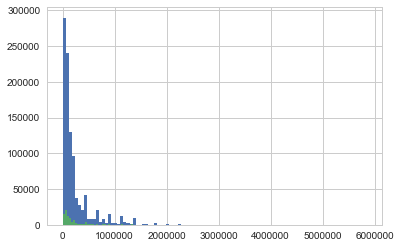

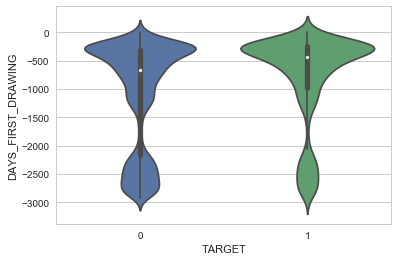

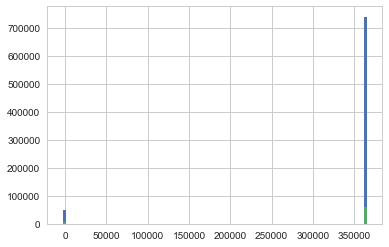

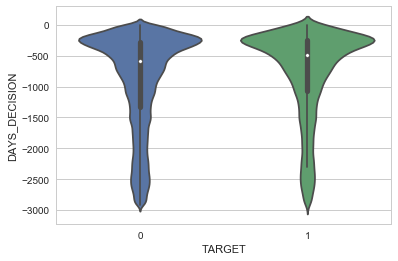

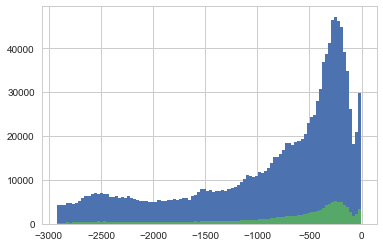

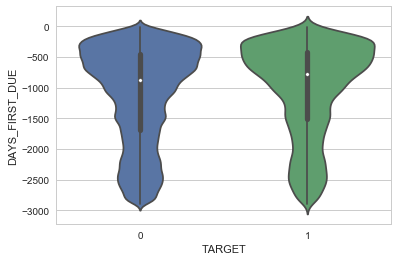

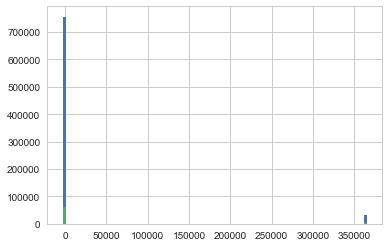

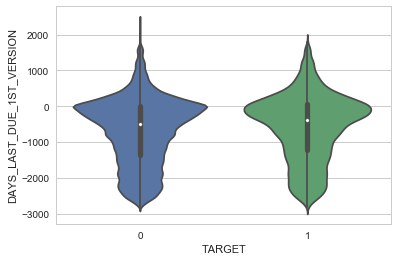

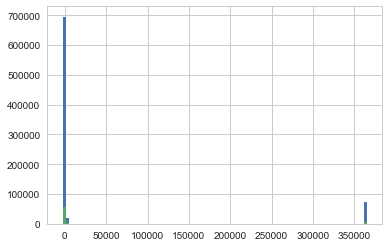

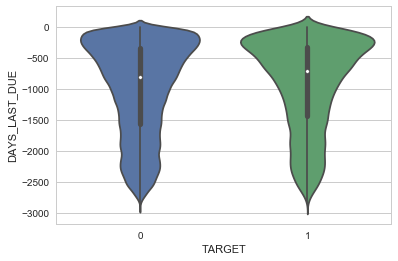

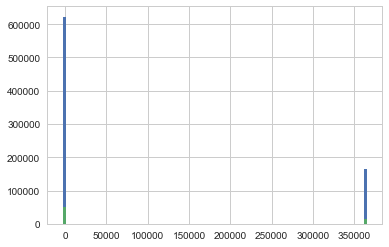

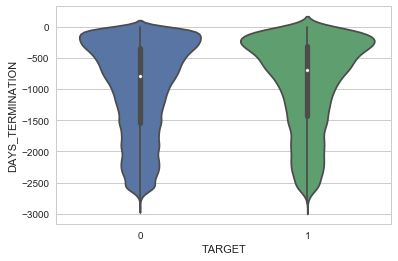

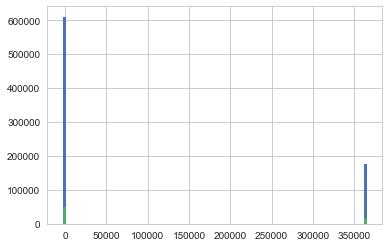

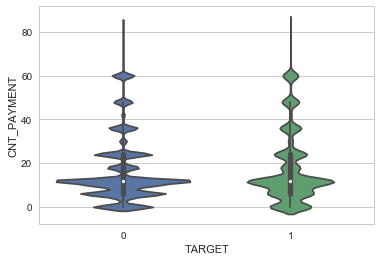

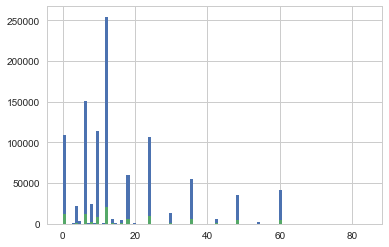

In [14]:
# 그래프로 그림 그려보기
for variable in previous_application_continuous:
    make_graph(variable)

In [ ]:
a, b = np.unique(previous_application.AMT_DOWN_PAYMENT, return_counts=True)
previous_application.AMT_DOWN_PAYMENT

- previous_application 파일은 대부분 지수함수, 로그함수 모양이라서 나중에 log 처리 등을 해주기
- "AMT_DOWN_PAYMENT"는 다른 값보다 극도로 큰 값이 있는 것 같은데 우선은 그대로 넣어서 해보고 아니면 구간 나눠서 처리 또는 이상치 제거

### 더미변수 변환
FLAG_LAST_APPL_PER_CONTRACT가 Y이면 1이고, N면 0으로 인코딩

In [14]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0,0
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,NaN,-512.0,-182.0,-392.0,-387.0,0.0,0
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,0
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,NaN,-485.0,565.0,-155.0,-147.0,1.0,0


In [15]:
# 더미변수 
previous_application.loc[previous_application.FLAG_LAST_APPL_PER_CONTRACT=="Y", "FLAG_LAST_APPL_PER_CONTRACT"] = 1
previous_application.loc[previous_application.FLAG_LAST_APPL_PER_CONTRACT=="N", "FLAG_LAST_APPL_PER_CONTRACT"] = 0

In [16]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,1,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0,0
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,1,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,1,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,NaN,-512.0,-182.0,-392.0,-387.0,0.0,0
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,1,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,0
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,1,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,NaN,-485.0,565.0,-155.0,-147.0,1.0,0


### Categorical 변수 변환


In [17]:
len(previous_application[previous_application.NAME_CONTRACT_TYPE == "XNA"])

313

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missin_values="NaN", strategy="most_frequent", axis=0)
previous_application[previous_application_multi] = imp.fit_transform(previous_application[previous_application_multi])

In [19]:
# categorical의 모든 "XNA"를 "z"으로 바꾸기 - 나중에 NaN으로 바꿈
# categorical의 모든 "XAP"를 "y"으로 바꾸기 - 나중에 NaN으로 바꿈
# categorical의 모든  NaN를 "x"으로 바꾸기 - 나중에 NaN으로 바꿈
previous_application.loc[:, previous_application_multi] = previous_application.loc[:, previous_application_multi].replace("XNA", "z")
previous_application.loc[:, previous_application_multi] = previous_application.loc[:, previous_application_multi].replace("XAP", "y")
previous_application.loc[:, previous_application_multi] = previous_application.loc[:, previous_application_multi].replace(np.NaN, "x")

In [20]:
previous_application["WEEKDAY_APPR_PROCESS_START"].replace("MONDAY", 1, inplace=True)
previous_application["WEEKDAY_APPR_PROCESS_START"].replace("TUESDAY", 2, inplace=True)
previous_application["WEEKDAY_APPR_PROCESS_START"].replace("WEDNESDAY", 3, inplace=True)
previous_application["WEEKDAY_APPR_PROCESS_START"].replace("THURSDAY", 4, inplace=True)
previous_application["WEEKDAY_APPR_PROCESS_START"].replace("FRIDAY", 5, inplace=True)
previous_application["WEEKDAY_APPR_PROCESS_START"].replace("SATURDAY", 6, inplace=True)
previous_application["WEEKDAY_APPR_PROCESS_START"].replace("SUNDAY", 0, inplace=True)

In [21]:
previous_application.head(100)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.00,17145.0,0.00,17145.00,6,15,1,1,0.000000,0.182832,0.867336,y,Approved,-73,Cash through the bank,y,x,Repeater,Mobile,POS,z,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0,0
1,1696966,271877,Consumer loans,68258.655,1800000.00,1754721.0,180000.00,1800000.00,6,18,1,1,0.101325,NaN,NaN,y,Refused,-472,Cash through the bank,SCO,x,Repeater,Clothing and Accessories,POS,z,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2154916,271877,Consumer loans,12417.390,108400.50,119848.5,0.00,108400.50,0,14,1,1,0.000000,NaN,NaN,y,Approved,-548,Cash through the bank,y,x,New,Furniture,POS,z,Stone,196,Furniture,12.0,middle,POS industry with interest,NaN,-512.0,-182.0,-392.0,-387.0,0.0,0
3,2802425,108129,Cash loans,25188.615,607500.00,679671.0,NaN,607500.00,4,11,1,1,NaN,NaN,NaN,z,Approved,-164,z,y,Unaccompanied,Repeater,z,Cash,x-sell,Contact center,-1,z,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,0
4,1536272,108129,Cash loans,21709.125,450000.00,512370.0,NaN,450000.00,3,9,1,1,NaN,NaN,NaN,z,Approved,-515,z,y,x,Repeater,z,Cash,x-sell,AP+ (Cash loan),6,z,36.0,low_normal,Cash X-Sell: low,NaN,-485.0,565.0,-155.0,-147.0,1.0,0
5,2068863,108129,Consumer loans,4830.930,47250.00,23688.0,24750.00,47250.00,4,11,1,1,0.556485,NaN,NaN,y,Approved,-619,Cash through the bank,y,Family,Repeater,Audio/Video,POS,z,Stone,110,Consumer electronics,6.0,high,POS household with interest,NaN,-588.0,-438.0,-588.0,-580.0,0.0,0
6,2551979,108129,Consumer loans,6664.275,71352.00,71352.0,0.00,71352.00,3,9,1,1,0.000000,NaN,NaN,y,Approved,-1208,Cash through the bank,y,Unaccompanied,New,Consumer Electronics,POS,z,Stone,108,Furniture,12.0,low_normal,POS industry with interest,NaN,-1176.0,-846.0,-846.0,-840.0,0.0,0
7,2517198,108129,Revolving loans,11250.000,0.00,225000.0,NaN,NaN,2,13,1,1,NaN,NaN,NaN,y,Approved,-957,z,y,x,Repeater,z,Cards,x-sell,Contact center,-1,z,0.0,z,Card X-Sell,-713.0,-673.0,NaN,-461.0,-61.0,0.0,0
8,1760610,108129,Consumer loans,8593.965,33052.50,33052.5,0.00,33052.50,0,10,1,1,0.000000,NaN,NaN,y,Approved,-819,Cash through the bank,y,Unaccompanied,Repeater,Computers,POS,z,Stone,108,Furniture,4.0,low_action,POS industry with interest,NaN,-783.0,-693.0,-753.0,-748.0,0.0,0
9,2523466,122040,Cash loans,15060.735,112500.00,136444.5,NaN,112500.00,2,11,1,1,NaN,NaN,NaN,z,Approved,-301,Cash through the bank,y,"Spouse, partner",Repeater,z,Cash,x-sell,Credit and cash offices,-1,z,12.0,high,Cash X-Sell: high,NaN,-271.0,59.0,NaN,NaN,1.0,0


In [22]:
len(previous_application[previous_application.NAME_CONTRACT_TYPE == "z"])

313

In [23]:
# label encoder로 텍스트를 숫자로 변환하고, "XNA" "XAP", "NaN"은 다시 NaN으로
from sklearn.preprocessing import LabelEncoder
def make_labelencoder(variable):
    model = LabelEncoder()
    model1 = model.fit(previous_application[variable])
    model2 = model1.transform(previous_application[variable])
    previous_application[variable] = model2
    a = list(model1.classes_)
    print(variable, model1.classes_, len(model1.classes_))
    
    if a[-1] == "z":
        previous_application[variable].replace(a.index(a[-1]), np.NaN, inplace=True)
        if a[-2] == "y":
            previous_application[variable].replace(a.index(a[-2]), np.NaN, inplace=True)
    elif a[-1] == "x":
        previous_application[variable].replace(a.index(a[-1]), np.NaN, inplace=True)

In [24]:
for variable in previous_application_multi:
    make_labelencoder(variable)

NAME_CONTRACT_TYPE ['Cash loans' 'Consumer loans' 'Revolving loans' 'z'] 4
WEEKDAY_APPR_PROCESS_START [0 1 2 3 4 5 6] 7
NAME_CASH_LOAN_PURPOSE ['Building a house or an annex' 'Business development' 'Buying a garage'
 'Buying a holiday home / land' 'Buying a home' 'Buying a new car'
 'Buying a used car' 'Car repairs' 'Education' 'Everyday expenses'
 'Furniture' 'Gasification / water supply' 'Hobby' 'Journey' 'Medicine'
 'Money for a third person' 'Other' 'Payments on other loans'
 'Purchase of electronic equipment' 'Refusal to name the goal' 'Repairs'
 'Urgent needs' 'Wedding / gift / holiday' 'y' 'z'] 25
NAME_CONTRACT_STATUS ['Approved' 'Canceled' 'Refused' 'Unused offer'] 4
NAME_PAYMENT_TYPE ['Cash through the bank' 'Cashless from the account of the employer'
 'Non-cash from your account' 'z'] 4
CODE_REJECT_REASON ['CLIENT' 'HC' 'LIMIT' 'SCO' 'SCOFR' 'SYSTEM' 'VERIF' 'y' 'z'] 9
NAME_TYPE_SUITE ['Children' 'Family' 'Group of people' 'Other_A' 'Other_B'
 'Spouse, partner' 'Unaccompanied

groupby로 같은 ID 묶기(연속변수)

In [27]:
p_a = previous_application.groupby("SK_ID_CURR")[previous_application_continuous+previous_application_normalized ].mean()

In [28]:
p_a.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,DAYS_FIRST_DRAWING,DAYS_DECISION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,CNT_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED
SK_ID_CURR,,,,,,,,,,,,,,,
100002,9251.775,179055.00,179055.00,0.00,179055.00,NaN,-606.000000,-565.000000,125.000000,-25.000000,-17.000000,24.000000,0.000000,NaN,NaN
100003,56553.990,435436.50,484191.00,3442.50,435436.50,NaN,-1305.000000,-1274.333333,-1004.333333,-1054.333333,-1047.333333,10.000000,0.050030,NaN,NaN
100004,5357.250,24282.00,20106.00,4860.00,24282.00,NaN,-815.000000,-784.000000,-694.000000,-724.000000,-714.000000,4.000000,0.212008,NaN,NaN
100006,23651.175,272203.26,291695.50,34840.17,408304.89,NaN,-272.444444,-325.666667,364.333333,-288.000000,-279.500000,23.000000,0.163412,NaN,NaN
100007,12278.805,150530.25,166638.75,3390.75,150530.25,NaN,-1222.833333,-1263.200000,-837.200000,-1140.500000,-1131.000000,20.666667,0.159516,NaN,NaN


groupby로 같은 ID묶기(category)

In [29]:
p_a[previous_application_dummy+previous_application_multi+['SELLERPLACE_AREA']] = previous_application.groupby("SK_ID_CURR").agg(pd.previous_application[previous_application_dummy+previous_application_multi+['SELLERPLACE_AREA']])

AttributeError: module 'pandas' has no attribute 'previous_application'

In [29]:
p_a.reset_index(inplace=True)

In [30]:
p_a.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,DAYS_FIRST_DRAWING,DAYS_DECISION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,CNT_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,HOUR_APPR_PROCESS_START,SELLERPLACE_AREA
0,100002,9251.775,179055.00,179055.00,0.00,179055.00,NaN,-606.000000,-565.000000,125.000000,-25.000000,-17.000000,24.000000,0.000000,NaN,NaN,1.0,1.0,0.0,1.0,6.0,NaN,0.0,NaN,NaN,NaN,0.0,24.0,3.0,NaN,7.0,0.0,2.0,15.0,9.0,500.0
1,100003,56553.990,435436.50,484191.00,3442.50,435436.50,NaN,-1305.000000,-1274.333333,-1004.333333,-1054.333333,-1047.333333,10.000000,0.050030,NaN,NaN,1.0,1.0,1.0,1.0,5.0,NaN,0.0,0.0,NaN,1.0,1.0,9.0,3.0,1.0,5.0,4.5,3.0,9.0,15.0,200.0
2,100004,5357.250,24282.00,20106.00,4860.00,24282.00,NaN,-815.000000,-784.000000,-694.000000,-724.000000,-714.000000,4.000000,0.212008,NaN,NaN,1.0,1.0,0.0,1.0,5.0,NaN,0.0,0.0,NaN,6.0,0.0,18.0,3.0,NaN,6.0,2.0,3.0,14.0,5.0,30.0
3,100006,23651.175,272203.26,291695.50,34840.17,408304.89,NaN,-272.444444,-325.666667,364.333333,-288.000000,-279.500000,23.000000,0.163412,NaN,NaN,1.0,1.0,0.0,0.0,4.0,NaN,0.0,0.0,2.0,6.0,2.0,4.0,2.0,1.0,5.0,3.5,2.0,6.0,15.0,-1.0
4,100007,12278.805,150530.25,166638.75,3390.75,150530.25,NaN,-1222.833333,-1263.200000,-837.200000,-1140.500000,-1131.000000,20.666667,0.159516,NaN,NaN,1.0,1.0,1.0,0.0,2.5,NaN,0.0,0.0,NaN,3.5,2.0,2.0,2.0,1.0,4.0,4.0,1.5,8.0,13.0,28.5


In [31]:
len(p_a)

291057

291057 위에서 확인한 값과 일치

NaN값 채우기 - 연속, 정규화 변수는 평균으로, category, dummy 변수는 최빈값으로

In [32]:
# 누락된 값 넣기
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
final = imp.fit_transform(p_a[["SK_ID_CURR"]+previous_application_continuous+previous_application_normalized ])

In [33]:
final = pd.DataFrame(final, columns=[["SK_ID_CURR"]+previous_application_continuous+previous_application_normalized ])

In [34]:
final.head(100)

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,DAYS_FIRST_DRAWING,DAYS_DECISION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,CNT_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED
0,100002.0,9251.775000,1.790550e+05,1.790550e+05,0.000000,1.790550e+05,-1052.851489,-606.000000,-565.000000,125.000000,-25.000000,-17.000000,24.000000,0.000000,0.189817,0.771133
1,100003.0,56553.990000,4.354365e+05,4.841910e+05,3442.500000,4.354365e+05,-1052.851489,-1305.000000,-1274.333333,-1004.333333,-1054.333333,-1047.333333,10.000000,0.050030,0.189817,0.771133
2,100004.0,5357.250000,2.428200e+04,2.010600e+04,4860.000000,2.428200e+04,-1052.851489,-815.000000,-784.000000,-694.000000,-724.000000,-714.000000,4.000000,0.212008,0.189817,0.771133
3,100006.0,23651.175000,2.722033e+05,2.916955e+05,34840.170000,4.083049e+05,-1052.851489,-272.444444,-325.666667,364.333333,-288.000000,-279.500000,23.000000,0.163412,0.189817,0.771133
4,100007.0,12278.805000,1.505302e+05,1.666388e+05,3390.750000,1.505302e+05,-1052.851489,-1222.833333,-1263.200000,-837.200000,-1140.500000,-1131.000000,20.666667,0.159516,0.189817,0.771133
5,100008.0,15839.696250,1.557018e+05,1.627677e+05,5548.500000,1.946272e+05,-1052.851489,-1192.000000,-1434.500000,-1044.500000,-1209.500000,-872.750000,14.000000,0.073051,0.189817,0.771133
6,100009.0,10051.412143,7.674171e+04,7.013764e+04,9203.142857,7.674171e+04,-1052.851489,-719.285714,-688.285714,-478.285714,-595.833333,-588.833333,8.000000,0.126602,0.189817,0.771133
7,100010.0,27463.410000,2.472120e+05,2.608110e+05,0.000000,2.472120e+05,-1052.851489,-1070.000000,-1039.000000,-769.000000,-769.000000,-762.000000,10.000000,0.000000,0.189817,0.771133
8,100011.0,18303.195000,2.027329e+05,2.618404e+05,6797.250000,2.703105e+05,-2277.000000,-1784.500000,-1955.000000,-1218.000000,-1231.000000,-734.500000,14.000000,0.050005,0.189817,0.771133
9,100012.0,7894.155000,6.093000e+04,7.411950e+04,0.000000,8.124000e+04,-1052.851489,-779.750000,-973.333333,-463.333333,-563.333333,-559.333333,18.000000,0.000000,0.189817,0.771133


In [ ]:
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
a = pd.DataFrame(imp.fit_transform(p_a[["SK_ID_CURR"]+previous_application_dummy+previous_application_multi+['SELLERPLACE_AREA']]), 
                                                                                                 columns=[previous_application_dummy+previous_application_multi+['SELLERPLACE_AREA']])

In [ ]:
a

In [92]:
final[previous_application_dummy+previous_application_multi+['SELLERPLACE_AREA']] = a

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [89]:
final.head(100)

array([[1.000e+00, 1.000e+00, 0.000e+00, ..., 1.500e+01, 9.000e+00,
        5.000e+02],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 9.000e+00, 1.500e+01,
        2.000e+02],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 1.400e+01, 5.000e+00,
        3.000e+01],
       ...,
       [1.000e+00, 1.000e+00, 5.000e-01, ..., 1.300e+01, 1.150e+01,
        2.200e+01],
       [1.000e+00, 1.000e+00, 5.000e-01, ..., 1.100e+01, 1.500e+01,
        1.578e+03],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 8.000e+00, 1.400e+01,
        1.300e+01]])